<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2020/21</h2>
<h2>Daniela Paolotti & Michele Tizzoni</h2>
<h3>Epidemic spreading on temporal networks</h3>
<hr>
</center>

### The temporal dynamics of networks affect dynamical processes that take place on top of them

In 2001, Liljeros and collaborators found that the network of human sexual contacts is "scale-free" concluding that STI can be hard to eradicate because of such property. 

See: https://www.nature.com/nature/journal/v411/n6840/full/411907a0.html

However, their conclusions were only partially true because the network of human sexual contacts is a *dynamical network* and temporal fluctuations are very important when considering a dynamical processes that take place on top of it.

In 2011, Rocha and collaborators published a temporal dataset of sexual contacts in Brazil: http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1001109.
We use this dataset to simulate an epidemic process (SI) and compare results between the static aggregated network and the dynamic network.

In [1]:
import networkx as nx
from collections import defaultdict

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn as sns

In [4]:
filepath='./../network_data/Dataset_sexual_network.csv'

In [5]:
edgelist=defaultdict(list)

In [6]:
finput=open(filepath,'r')
for line in finput.readlines():
    
    if line[0]!='#':#not a comment
        s=line.strip().split(';')
        
        day=int(s[2])
        edge=(int(s[0]), int(s[1]))
                
        edgelist[day].append(edge)
        
finput.close()

We first create the aggregated network 

In [7]:
G_agg=nx.Graph()
G_agg.disease_status={}

In [8]:
daystart=800#we skip the transient
dayend=1800

In [9]:
for d in edgelist:
    if d>=daystart and d<=dayend:
        links=edgelist[d]
        G_agg.add_edges_from(links)#we add the link to the graph

print("The aggregated network has", len(G_agg.nodes()),"nodes")
print("The aggregated network has", len(G_agg.edges()),"links")

The aggregated network has 11306 nodes
The aggregated network has 23345 links


In [10]:
nx.is_connected(G_agg)

False

In [11]:
nx.number_connected_components(G_agg)

337

In [12]:
for i in nx.connected_components(G_agg):
    print(len(i))

10566
3
2
2
2
2
2
2
2
3
2
4
2
2
3
2
3
2
3
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
2
2
6
2
4
2
4
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
2
2
2
2
2
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
2
2
3
2
2
2
2
2
3
2
2
2
8
2
5
2
3
3
2
2
2
2
4
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
5
3
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
4
2
2
2
2
2
4
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


---
# Simulations on the time-aggregated graph

In [13]:
#let's choose a random seed
import random

seed_links=edgelist[daystart]
print(len(seed_links))

random.shuffle(seed_links)
seed=seed_links[0][0]

print("The degree of the seed is", G_agg.degree(seed))

12
The degree of the seed is 54


In [16]:
infected_nodes=[]
infected_nodes.append(seed)

for n in G_agg.nodes():
    if n in infected_nodes:
        G_agg.disease_status[n]=1
        #infected
    else:
        G_agg.disease_status[n]=0
        #susceptible

In [17]:
Itime_agg=[]

#there are 1000 days of network activity but the network does not change!

for t in range(0,1000):
    
    for i in infected_nodes:
        for j in G_agg.neighbors(i):
            if G_agg.disease_status[j]==0:
                G_agg.disease_status[j]=1#the probability of infection is 1!!
                
    #ciclo per aggiornare l'elenco dei nodi infetti
    infected_nodes=[]
    for n in G_agg.nodes():
        if G_agg.disease_status[n]==1:
            infected_nodes.append(n)
 
    Itime_agg.append(len(infected_nodes))

print("The final size of the epidemic is", float(len(infected_nodes))/len(G_agg.nodes()))

The final size of the epidemic is 0.9345480275959668


[0, 20, -1, 10600]

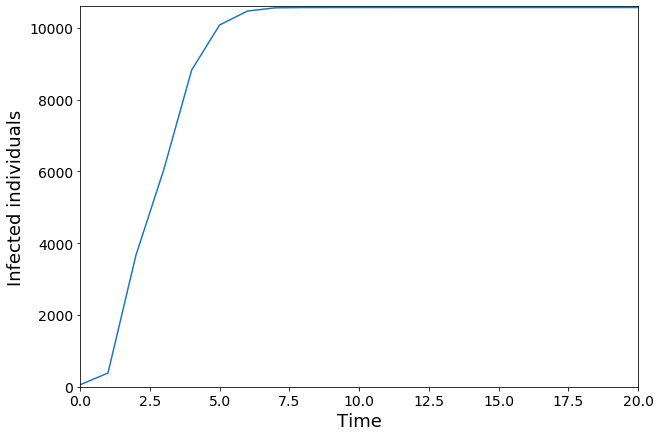

In [18]:
plt.figure(figsize=(10,7))
plt.xlabel('Time', fontsize=18)
plt.ylabel('Infected individuals', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(range(0,len(Itime_agg)),Itime_agg)
plt.axis([0,20,-1,10600])

---
# Simulations on the full dynamic network

In [19]:
G_dyn=nx.Graph()
G_dyn.disease_status={}

In [20]:
seed_links=edgelist[daystart]
random.shuffle(seed_links)
seed=seed_links[0][0]

In [21]:
seed

1941

In [22]:
infected_nodes=[]
infected_nodes.append(seed)

G_dyn.add_edges_from(seed_links)#we consider only the links that are active on day 0

for n in G_dyn.nodes():
    if n in infected_nodes:
        G_dyn.disease_status[n]=1
        #infected
    else:
        G_dyn.disease_status[n]=0
        #susceptible

In [23]:
Itime_dyn=[]

for t in range(daystart,dayend+1):

    links=edgelist[t]#these are the links active on day t
    
    if t==daystart:
        print("The temporal network has", len(G_dyn.nodes()),"nodes on day", daystart)
        print("The temporal network has", len(G_dyn.edges()),"edges on day", daystart)
        print("The degree of the seed is", G_dyn.degree(seed))
    else:
        G_dyn.add_edges_from(links)
        for e in links:
            if e[0] not in G_dyn.disease_status:
                G_dyn.disease_status[e[0]]=0
            if e[1] not in G_dyn.disease_status:
                G_dyn.disease_status[e[1]]=0

    
    #ciclo sui nodi infetti per la trasmissione
    for i in infected_nodes:
        for j in G_dyn.neighbors(i):
            if G_dyn.disease_status[j]==0:
                G_dyn.disease_status[j]=1
                
    #ciclo per aggiornare l'elenco dei nodi infetti
    infected_nodes=[]
    for n in G_dyn.nodes():
        if G_dyn.disease_status[n]==1:
            infected_nodes.append(n)
    
    Itime_dyn.append(len(infected_nodes))

    #stampo il numero di nodi infetti a ogni time-step
    G_dyn.remove_edges_from(links)

print("The final size of the epidemic is", float(len(infected_nodes))/len(G_dyn.nodes()))


The temporal network has 22 nodes on day 800
The temporal network has 12 edges on day 800
The degree of the seed is 1
The final size of the epidemic is 0.7293472492481868


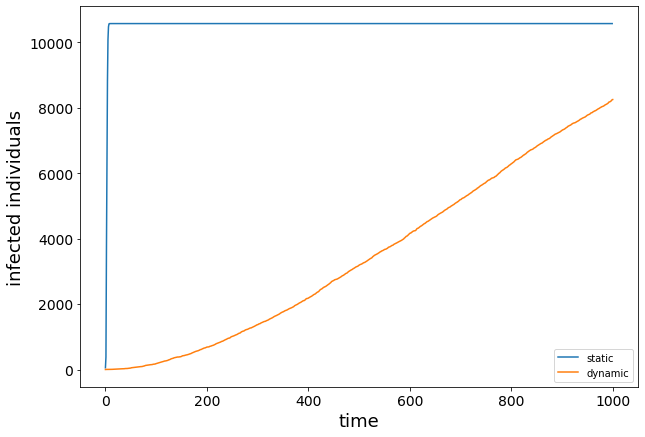

In [25]:
plt.figure(figsize=(10,7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('time', fontsize=18)
plt.ylabel('infected individuals', fontsize=18)
plt.plot(range(0,len(Itime_agg)),Itime_agg, label='static')
plt.plot(range(0,len(Itime_dyn)),Itime_dyn, label='dynamic')
plt.legend()
#plt.axis([0,365,-1,10600])